In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('houseprice.csv',usecols=["SalePrice","MSSubClass","MSZoning","LotFrontage","LotArea",
                                        "Street","YearBuilt","LotShape","1stFlrSF","2ndFlrSF"]).dropna()

In [3]:
df.shape

(1201, 10)

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [6]:
for i in df.columns:
    print("Column name{} and unique values are {}".format(i,len(df[i].unique())))

Column nameMSSubClass and unique values are 15
Column nameMSZoning and unique values are 5
Column nameLotFrontage and unique values are 110
Column nameLotArea and unique values are 869
Column nameStreet and unique values are 2
Column nameLotShape and unique values are 4
Column nameYearBuilt and unique values are 112
Column name1stFlrSF and unique values are 678
Column name2ndFlrSF and unique values are 368
Column nameSalePrice and unique values are 597


In [7]:
import datetime
datetime.datetime.now().year

2021

In [8]:
df['Total Years']=datetime.datetime.now().year-df['YearBuilt']

In [9]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,18
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,45
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,20
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,106
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,21


In [10]:
df.drop('YearBuilt',axis=1,inplace=True)

In [11]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [12]:
##Creating Categorical Features
cat_features=['MSSubClass','MSZoning','Street','LotShape']
out_features='SalePrice'

In [13]:
df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  80, 160,  75, 180,
        40,  85], dtype=int64)

In [14]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders['MSSubClass']=LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(df['MSSubClass'])

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [15]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [16]:
label_encoder={}
for feature in cat_features:
    label_encoder[feature]=LabelEncoder()
    df[feature]=label_encoder[feature].fit_transform(df[feature])

In [17]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,18
1,0,3,80.0,9600,1,3,1262,0,181500,45
2,5,3,68.0,11250,1,0,920,866,223500,20
3,6,3,60.0,9550,1,0,961,756,140000,106
4,5,3,84.0,14260,1,0,1145,1053,250000,21
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,22
1456,0,3,85.0,13175,1,3,2073,0,210000,43
1457,6,3,66.0,9042,1,3,1188,1152,266500,80
1458,0,3,68.0,9717,1,3,1078,0,142125,71


In [18]:
##convertto numpy
cat_features=df[["MSSubClass","MSZoning","Street","LotShape"]].to_numpy()
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

In [19]:
## convert numpy to Tensors
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [20]:
### create continuous variable
cont_features=[]
for i in df.columns:
    if i in ["MSSubClass","MSZoning","Street","LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [21]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [22]:
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    18.],
        [   80.,  9600.,  1262.,     0.,    45.],
        [   68., 11250.,   920.,   866.,    20.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    80.],
        [   68.,  9717.,  1078.,     0.,    71.],
        [   75.,  9937.,  1256.,     0.,    56.]])

In [23]:
cont_values.dtype

torch.float32

In [24]:
### Dependent Feature
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int32  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int32  
 5   LotShape     1201 non-null   int32  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total Years  1201 non-null   int64  
dtypes: float64(1), int32(3), int64(6)
memory usage: 89.1 KB


In [26]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [27]:
len(df['MSSubClass'].unique())

15

In [28]:
##Embedding size for categorical columns
cat_dims=[len(df[col].unique()) for col in ["MSSubClass","MSZoning","Street","LotShape"]]

In [29]:
cat_dims

[15, 5, 2, 4]

In [30]:
## output dimension should be setbased on the input dimension(min(50,features dimension /2))
embedding_dim=[(x,min(50,(x+1)//2)) for x in cat_dims]

In [31]:
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [33]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [34]:
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [35]:
pd.set_option('display.max_rows',500)
embedding_val=[]
for i, e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [36]:
embedding_val

[tensor([[-0.6766, -0.0098,  0.5389,  ..., -1.9289, -0.2292, -0.1977],
         [-0.1348, -1.0387,  1.0073,  ...,  2.0447, -1.7064, -1.3974],
         [-0.6766, -0.0098,  0.5389,  ..., -1.9289, -0.2292, -0.1977],
         ...,
         [ 1.1802, -0.1769,  0.0502,  ...,  0.2425, -0.9668, -0.5560],
         [-0.1348, -1.0387,  1.0073,  ...,  2.0447, -1.7064, -1.3974],
         [-0.1348, -1.0387,  1.0073,  ...,  2.0447, -1.7064, -1.3974]],
        grad_fn=<EmbeddingBackward>),
 tensor([[-0.9964,  1.4738, -0.9475],
         [-0.9964,  1.4738, -0.9475],
         [-0.9964,  1.4738, -0.9475],
         ...,
         [-0.9964,  1.4738, -0.9475],
         [-0.9964,  1.4738, -0.9475],
         [-0.9964,  1.4738, -0.9475]], grad_fn=<EmbeddingBackward>),
 tensor([[-1.7190],
         [-1.7190],
         [-1.7190],
         ...,
         [-1.7190],
         [-1.7190],
         [-1.7190]], grad_fn=<EmbeddingBackward>),
 tensor([[ 0.6284, -0.3872],
         [ 0.6284, -0.3872],
         [-0.8821,  0.125

In [37]:
z=torch.cat(embedding_val,1)
z

tensor([[-0.6766, -0.0098,  0.5389,  ..., -1.7190,  0.6284, -0.3872],
        [-0.1348, -1.0387,  1.0073,  ..., -1.7190,  0.6284, -0.3872],
        [-0.6766, -0.0098,  0.5389,  ..., -1.7190, -0.8821,  0.1258],
        ...,
        [ 1.1802, -0.1769,  0.0502,  ..., -1.7190,  0.6284, -0.3872],
        [-0.1348, -1.0387,  1.0073,  ..., -1.7190,  0.6284, -0.3872],
        [-0.1348, -1.0387,  1.0073,  ..., -1.7190,  0.6284, -0.3872]],
       grad_fn=<CatBackward>)

In [38]:
##implement Dropout
dropout=nn.Dropout(.4)

In [39]:
final_embedded=dropout(z)
final_embedded

tensor([[-0.0000, -0.0164,  0.0000,  ..., -2.8650,  0.0000, -0.0000],
        [-0.0000, -0.0000,  1.6788,  ..., -2.8650,  1.0474, -0.0000],
        [-0.0000, -0.0000,  0.0000,  ..., -0.0000, -1.4701,  0.0000],
        ...,
        [ 1.9669, -0.2948,  0.0000,  ..., -2.8650,  0.0000, -0.0000],
        [-0.0000, -0.0000,  0.0000,  ..., -2.8650,  1.0474, -0.0000],
        [-0.0000, -0.0000,  1.6788,  ..., -2.8650,  1.0474, -0.0000]],
       grad_fn=<MulBackward0>)

In [40]:
##create a Feed Forward Neural Network
class FeedForwardNN(nn.Module):
    
    def __init__(self,embedding_dim,n_cont,out_sz,layers,p=0.5):
        super().__init__()
        self.embeds=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop=nn.Dropout(p)
        self.bn_cont=nn.BatchNorm1d(n_cont)

        layerlist=[]
        n_emb=sum((out for inp,out in embedding_dim))
        n_in=n_emb+n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in=i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        
        self.layers=nn.Sequential(*layerlist)
        
    def forward(self,x_cat,x_cont):
        embeddings=[]
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x=torch.cat(embeddings,1)
        x=self.emb_drop(x)
        
        x_cont=self.bn_cont(x_cont)
        x=torch.cat([x,x_cont],1)
        x=self.layers(x)
        return x

In [41]:
len(cont_features)

5

In [42]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [43]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

## Define Loss and Optimizer

In [44]:
model.parameters

<bound method Module.parameters of FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)>

In [45]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [46]:
df.shape

(1201, 10)

In [47]:
cont_values.shape

torch.Size([1201, 5])

In [48]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [49]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [50]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train))
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 200496.75
Epoch number: 11 and the loss : 200493.46875
Epoch number: 21 and the loss : 200489.140625
Epoch number: 31 and the loss : 200482.640625
Epoch number: 41 and the loss : 200473.25
Epoch number: 51 and the loss : 200461.375
Epoch number: 61 and the loss : 200446.40625
Epoch number: 71 and the loss : 200429.359375
Epoch number: 81 and the loss : 200408.0
Epoch number: 91 and the loss : 200383.421875
Epoch number: 101 and the loss : 200355.3125
Epoch number: 111 and the loss : 200322.125
Epoch number: 121 and the loss : 200291.4375
Epoch number: 131 and the loss : 200252.015625
Epoch number: 141 and the loss : 200206.609375
Epoch number: 151 and the loss : 200162.234375
Epoch number: 161 and the loss : 200112.25
Epoch number: 171 and the loss : 200059.6875
Epoch number: 181 and the loss : 200005.875
Epoch number: 191 and the loss : 199946.453125
Epoch number: 201 and the loss : 199881.765625
Epoch number: 211 and the loss : 199815.96875
Epoch number

Epoch number: 1771 and the loss : 154350.6875
Epoch number: 1781 and the loss : 154073.46875
Epoch number: 1791 and the loss : 153763.140625
Epoch number: 1801 and the loss : 153091.3125
Epoch number: 1811 and the loss : 153135.109375
Epoch number: 1821 and the loss : 152282.09375
Epoch number: 1831 and the loss : 152399.65625
Epoch number: 1841 and the loss : 151584.453125
Epoch number: 1851 and the loss : 150676.8125
Epoch number: 1861 and the loss : 150784.265625
Epoch number: 1871 and the loss : 150043.15625
Epoch number: 1881 and the loss : 149318.125
Epoch number: 1891 and the loss : 148361.859375
Epoch number: 1901 and the loss : 148588.0625
Epoch number: 1911 and the loss : 149201.421875
Epoch number: 1921 and the loss : 147681.25
Epoch number: 1931 and the loss : 147326.3125
Epoch number: 1941 and the loss : 146615.140625
Epoch number: 1951 and the loss : 146531.59375
Epoch number: 1961 and the loss : 146603.421875
Epoch number: 1971 and the loss : 145560.03125
Epoch number: 1

Epoch number: 3511 and the loss : 72859.421875
Epoch number: 3521 and the loss : 69400.4453125
Epoch number: 3531 and the loss : 71379.0546875
Epoch number: 3541 and the loss : 68151.8671875
Epoch number: 3551 and the loss : 68199.171875
Epoch number: 3561 and the loss : 66590.125
Epoch number: 3571 and the loss : 66438.9921875
Epoch number: 3581 and the loss : 66333.65625
Epoch number: 3591 and the loss : 69623.0
Epoch number: 3601 and the loss : 64281.01953125
Epoch number: 3611 and the loss : 65760.53125
Epoch number: 3621 and the loss : 67436.7421875
Epoch number: 3631 and the loss : 63405.328125
Epoch number: 3641 and the loss : 64618.71484375
Epoch number: 3651 and the loss : 62771.40625
Epoch number: 3661 and the loss : 64089.75
Epoch number: 3671 and the loss : 62817.50390625
Epoch number: 3681 and the loss : 61478.18359375
Epoch number: 3691 and the loss : 61694.96875
Epoch number: 3701 and the loss : 60385.90234375
Epoch number: 3711 and the loss : 61687.92578125
Epoch number

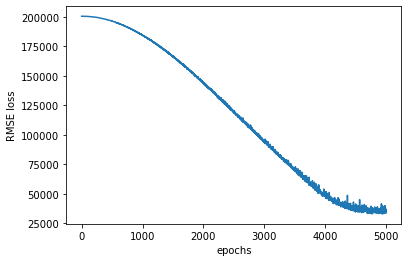

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs),final_losses)
plt.ylabel("RMSE loss")
plt.xlabel('epochs');

In [52]:
## validate the test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 44610.72265625


In [53]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [54]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [55]:
data_predicted

,Prediction
0,157804.312500
1,219449.109375
2,143227.765625
3,224338.265625
4,205148.687500
5,213588.234375
6,150555.890625
7,291698.625000
8,150066.937500
9,373372.093750


In [56]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output["Difference"]=final_output["Test"]-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,157804.312500,-27804.312500
1,138887.0,219449.109375,-80562.109375
2,175500.0,143227.765625,32272.234375
3,195000.0,224338.265625,-29338.265625
4,142500.0,205148.687500,-62648.687500
